In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/BankDA.csv')
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Customer ID', ' DOB', ' Gender', 'Location', 'Account Type', ' Account Balance', 'Credit Score', 'Income ($)', 'Total Transactions ($)', 'Average Purchase Value', ' Transaction Frequency(per year)', 'Ac Tenure', 'Customer Lifetime Value']


In [21]:
try:
    df.columns = df.columns.str.strip()
    print("Data loaded. Shape:", df.shape)
except Exception as e:
    print("Loading error:", e)

# Select and process numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numerical_cols)

# Handle missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[numerical_cols])
features_scaled_df = pd.DataFrame(features_scaled, columns=numerical_cols)
print("\nScaled features shape:", features_scaled_df.shape)

Data loaded. Shape: (99999, 13)
Numerical columns: ['Account Balance', 'Credit Score', 'Income ($)', 'Total Transactions ($)', 'Average Purchase Value', 'Transaction Frequency(per year)', 'Ac Tenure', 'Customer Lifetime Value']

Scaled features shape: (99999, 8)


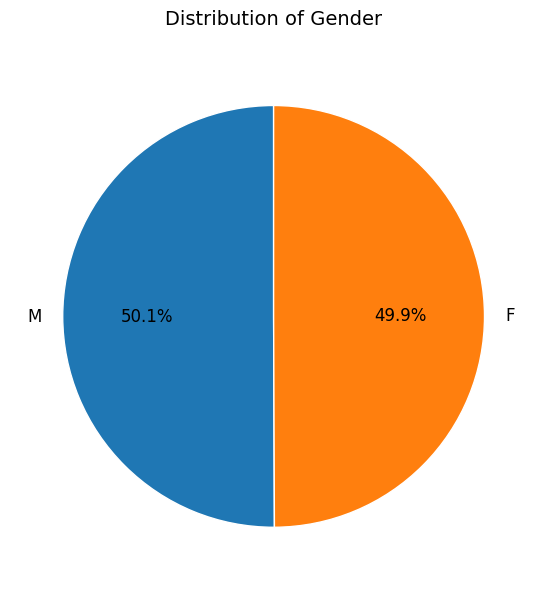

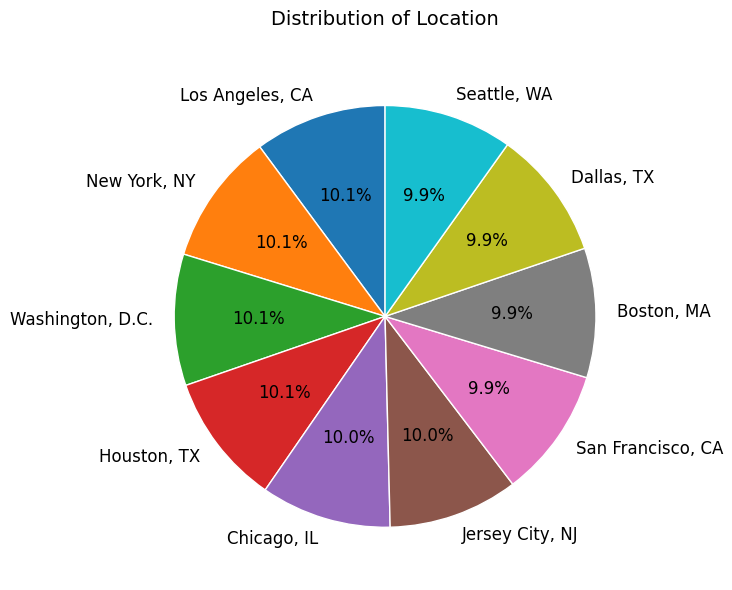

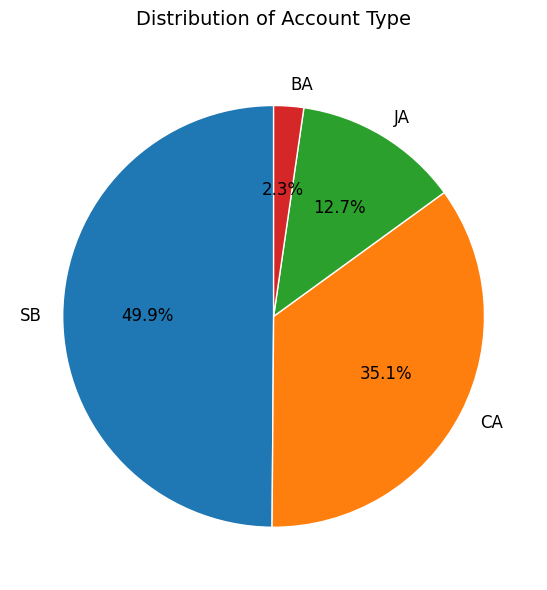

In [25]:
categorical_columns = ['Gender', 'Location', 'Account Type']

for col in categorical_columns:
    try:
        # Create figure with higher DPI for better quality
        plt.figure(figsize=(8, 6), dpi=100)

        # Create pie chart with improved formatting
        df[col].value_counts().plot.pie(
            autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Hide small percentages
            startangle=90,
            wedgeprops={'linewidth': 1, 'edgecolor': 'w'},
            textprops={'fontsize': 12}
        )

        plt.title(f'Distribution of {col}', pad=20, fontsize=14)
        plt.ylabel('')
        plt.tight_layout()
        plt.show()
        plt.close()  # Important for memory management in VS Code
    except KeyError:
        print(f"Column '{col}' not found in DataFrame")
    except Exception as e:
        print(f"Error creating plot for {col}: {str(e)}")

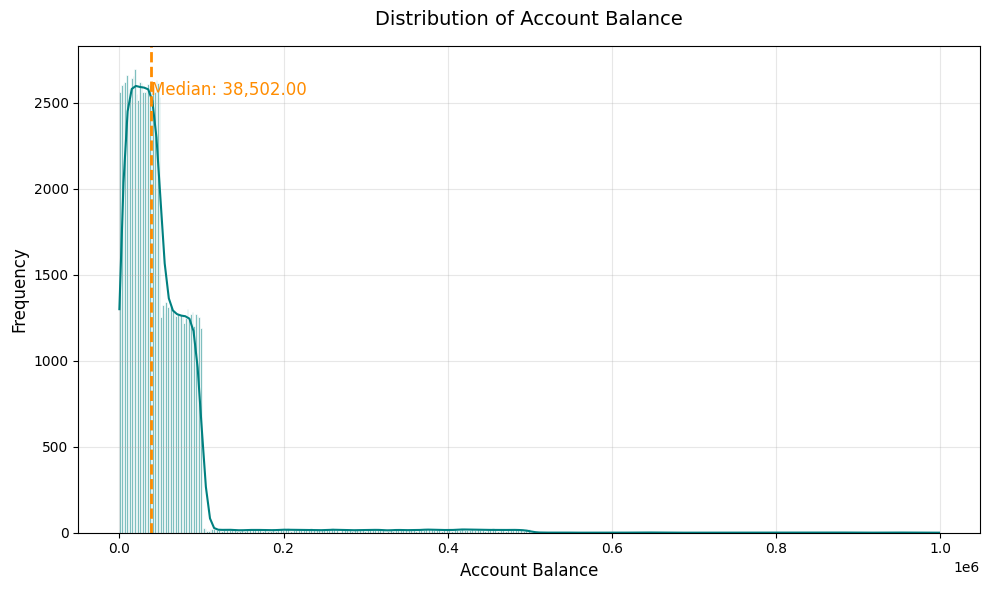

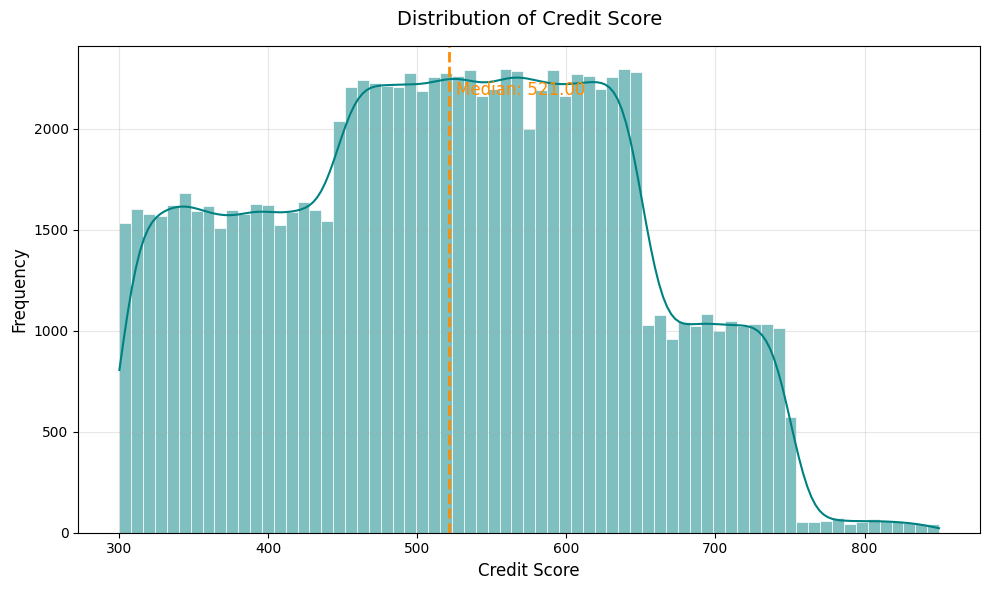

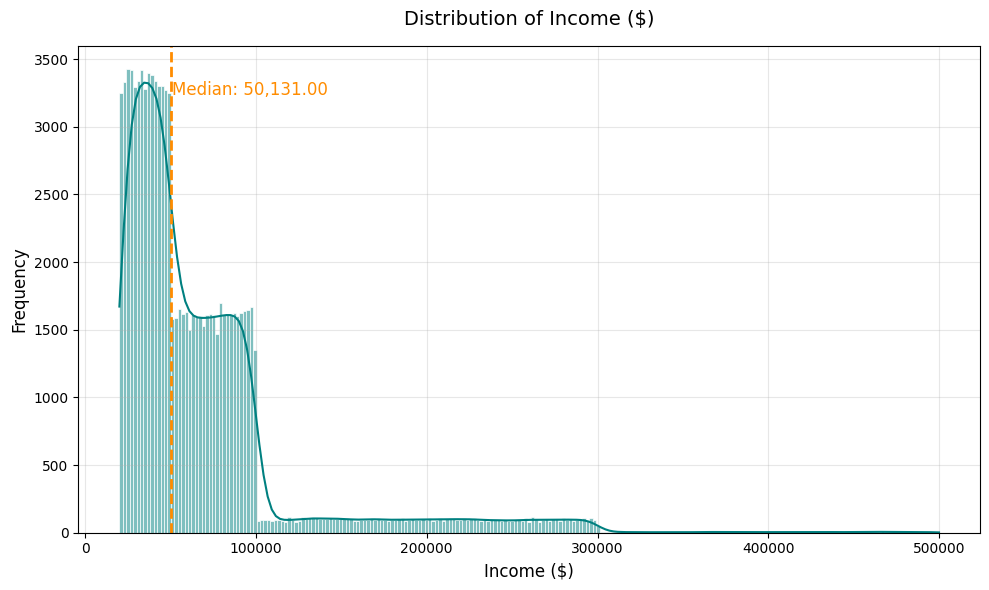

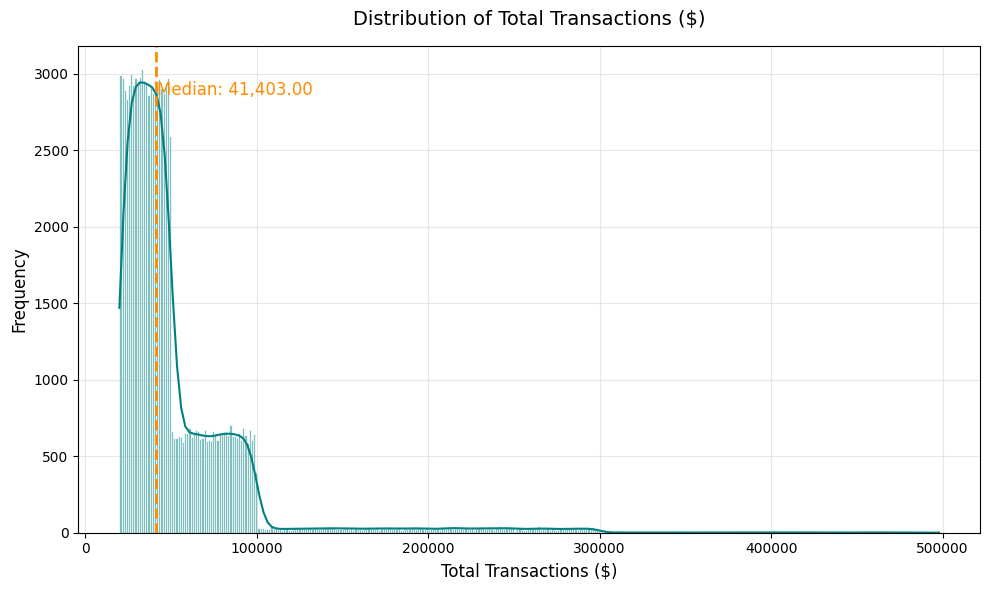

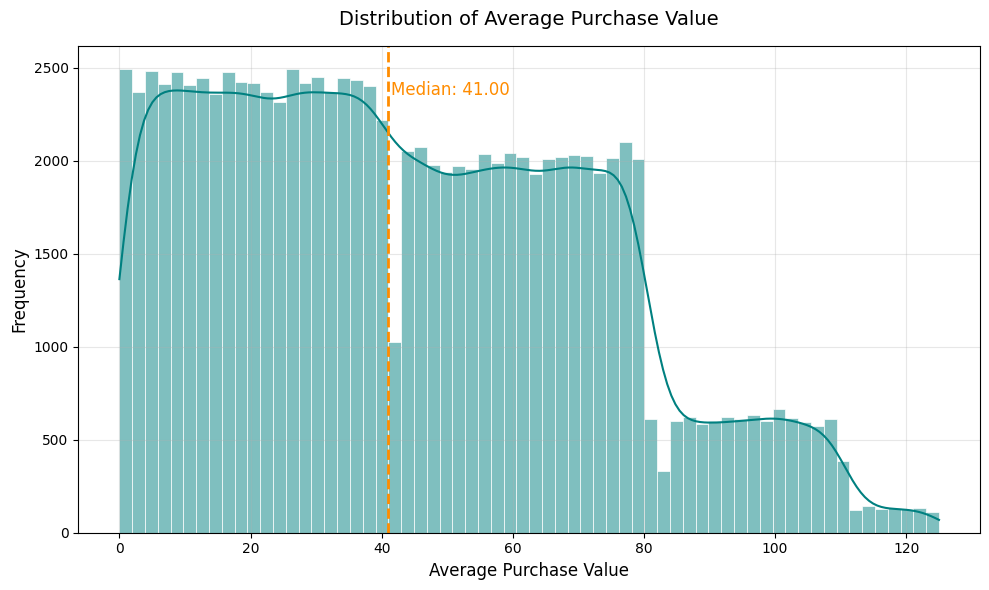

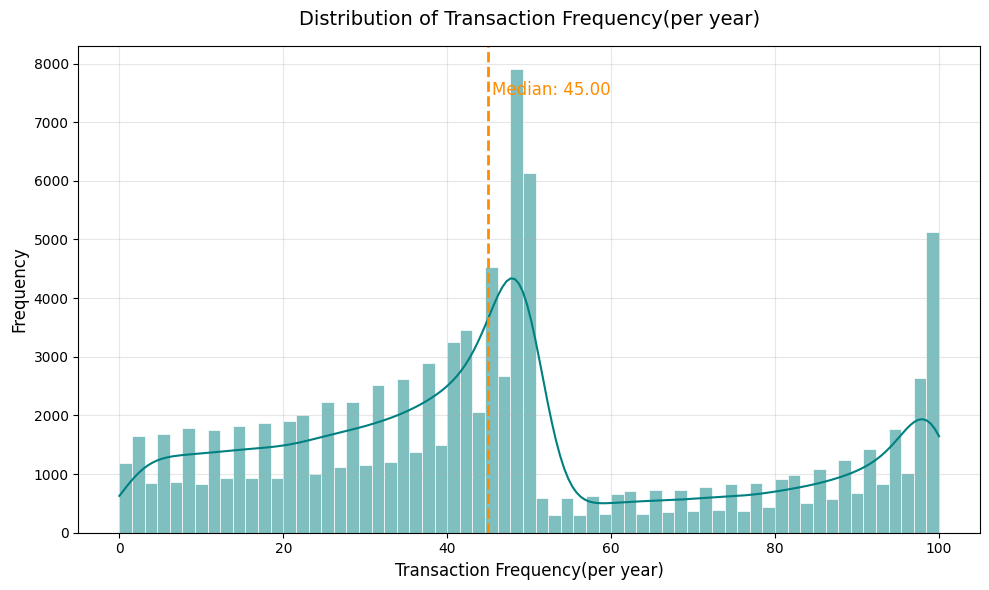

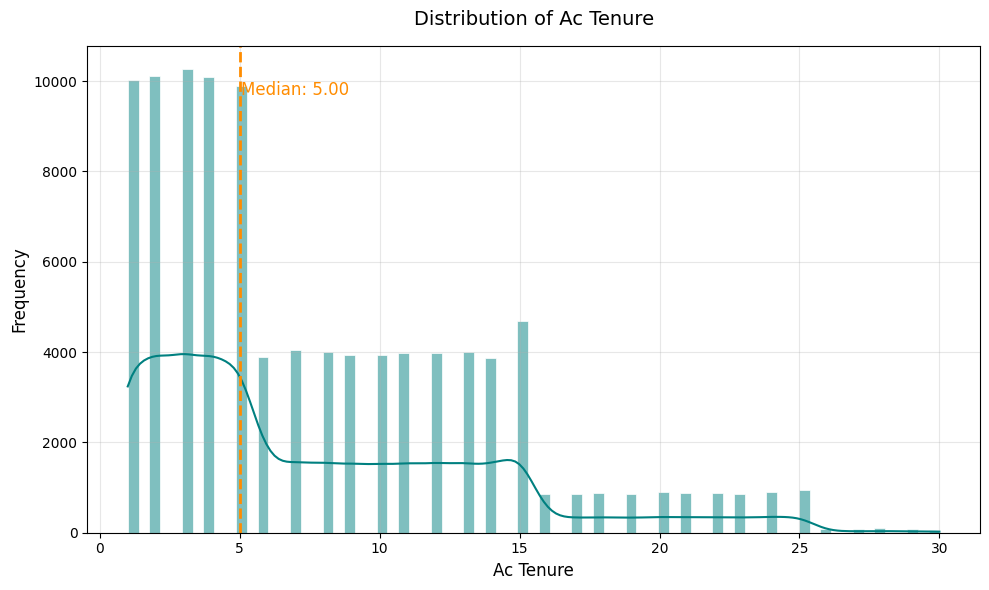

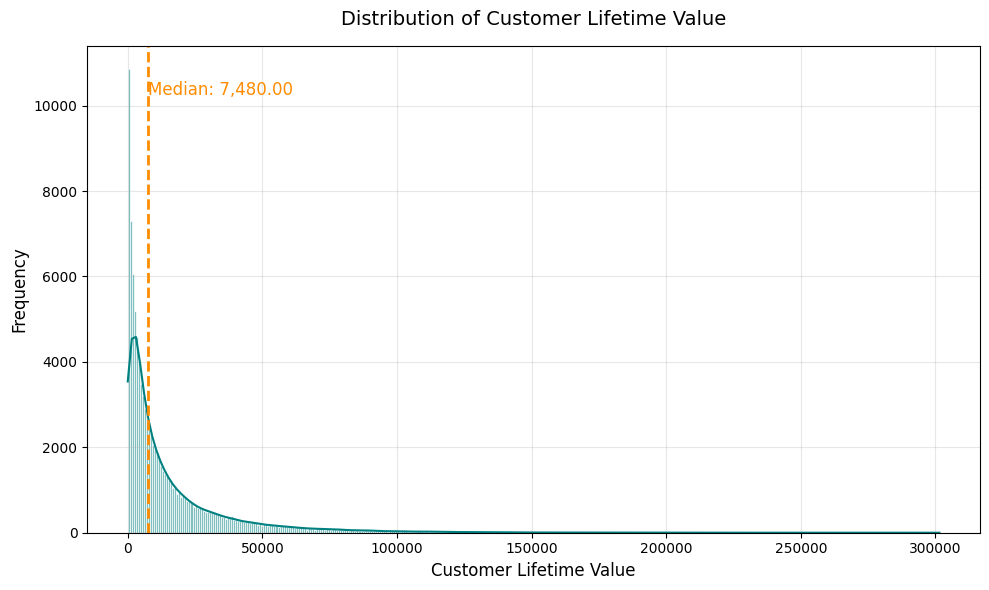

In [26]:
numerical_columns = [
    'Account Balance',
    'Credit Score',
    'Income ($)',
    'Total Transactions ($)',
    'Average Purchase Value',
    'Transaction Frequency(per year)',
    'Ac Tenure',
    'Customer Lifetime Value'
]

for col in numerical_columns:
    try:
        # Create figure with constrained layout
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

        # Create histogram with better default parameters
        sns.histplot(
            data=df,
            x=col,
            bins='auto',  # Let seaborn choose optimal bin size
            kde=True,
            color='teal',
            edgecolor='white',
            linewidth=0.5,
            ax=ax
        )

        # Add median line
        median_val = df[col].median()
        ax.axvline(median_val, color='darkorange', linestyle='--', linewidth=2)

        # Formatting
        ax.set_title(f'Distribution of {col}', fontsize=14, pad=15)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.grid(True, alpha=0.3)

        # Add median annotation
        ax.text(
            x=median_val * 1.01,
            y=ax.get_ylim()[1] * 0.9,
            s=f'Median: {median_val:,.2f}',
            color='darkorange',
            fontsize=12
        )

        plt.tight_layout()
        plt.show()
        plt.close()  # Prevent memory accumulation
    except KeyError:
        print(f"Column '{col}' not found in DataFrame")
    except Exception as e:
        print(f"Error creating plot for {col}: {str(e)}")

Columns in DataFrame: ['Customer ID', ' DOB', ' Gender', 'Location', 'Account Type', ' Account Balance', 'Credit Score', 'Income ($)', 'Total Transactions ($)', 'Average Purchase Value', ' Transaction Frequency(per year)', 'Ac Tenure', 'Customer Lifetime Value']
    Customer ID         DOB Gender          Location Account Type  \
0  WF8892633232   4/24/1975      F        Boston, MA           SB   
1  WF3210805568    9/5/1990      F  Washington, D.C.           SB   
2  WF0046530889   12/4/1961      F       Houston, TX           CA   
3  WF3694561801  10/22/2002      M       Seattle, WA           SB   
4  WF1968511672  10/16/1962      M       Houston, TX           SB   

   Account Balance  Credit Score  Income ($)  Total Transactions ($)  \
0            56461           736       43026                   58438   
1            45352           404       39313                   37406   
2            70460           694       82508                   49259   
3            98886           707  

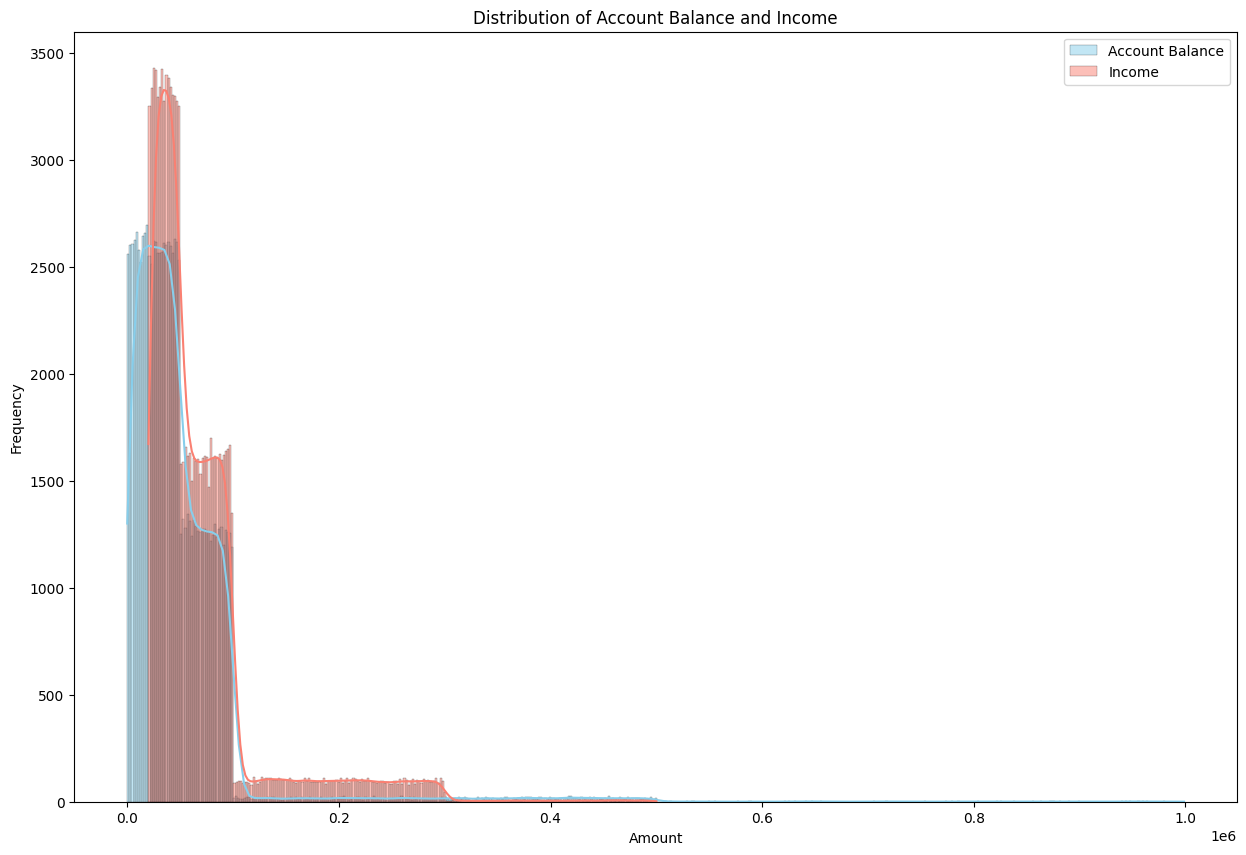

In [19]:
# Set up the visualization
plt.figure(figsize=(15, 10))  # Create a large figure for better readability

# Check if the columns exist
print("Columns in DataFrame:", df.columns.tolist())
df.columns = df.columns.str.strip()
print(df.head())

# Create histogram for Account Balance
if 'Account Balance' in df.columns:
    sns.histplot(data=df, x='Account Balance', kde=True,
                 color='skyblue', label='Account Balance')
else:
    print("Column 'Account Balance' does not exist.")

# Create histogram for Income
if 'Income ($)' in df.columns:
    sns.histplot(data=df, x='Income ($)', kde=True,
                 color='salmon', label='Income')
else:
    print("Column 'Income ($)' does not exist.")

# Add plot decorations
plt.title('Distribution of Account Balance and Income')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

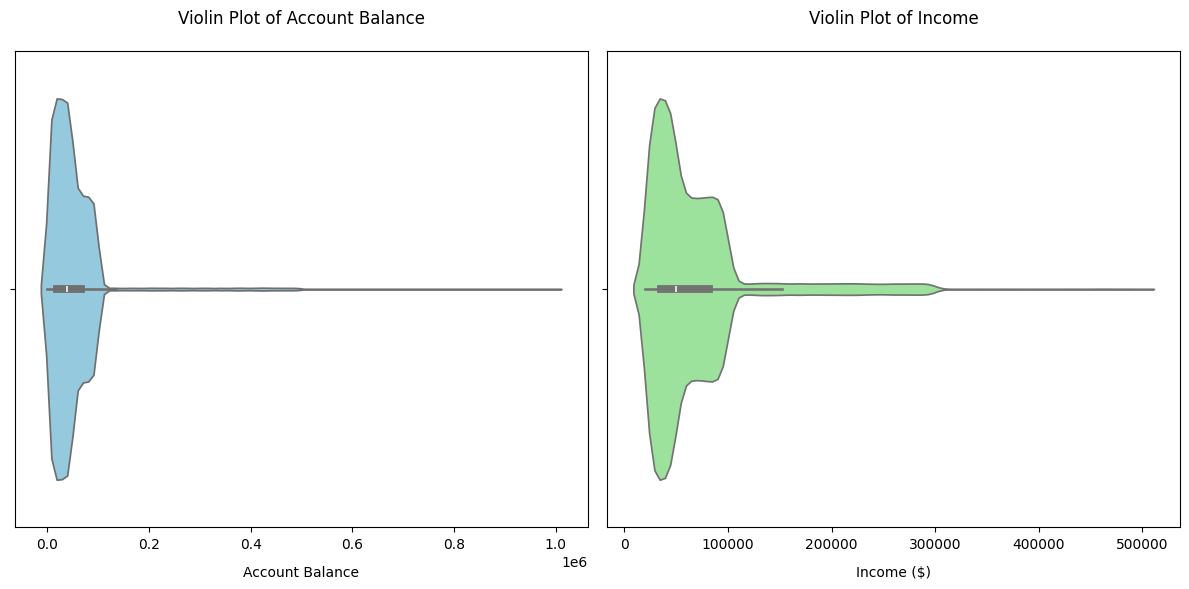

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First violin plot (Account Balance)
sns.violinplot(x='Account Balance', data=df, ax=ax1, color='skyblue')
ax1.set_title('Violin Plot of Account Balance', pad=20)
ax1.set_xlabel('Account Balance', labelpad=10)

# Second violin plot (Income)
sns.violinplot(x='Income ($)', data=df, ax=ax2, color='lightgreen')
ax2.set_title('Violin Plot of Income', pad=20)
ax2.set_xlabel('Income ($)', labelpad=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [22]:
# Create and fit KMeans model
N_CLUSTERS = 5
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled_df)

# Show cluster distribution
print("\nCluster distribution:")
print(df['Cluster'].value_counts())


Cluster distribution:
Cluster
2    38722
3    36529
0    14375
1     6937
4     3436
Name: count, dtype: int64


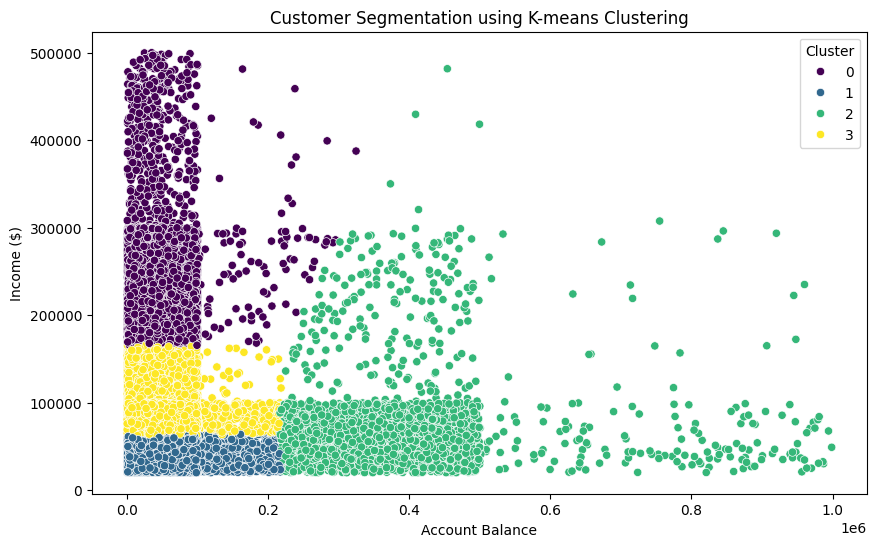

In [24]:
numerical_cols_for_corr = df.select_dtypes(include=np.number).columns

# Fill missing values with column mean
df[numerical_cols_for_corr] = df[numerical_cols_for_corr].fillna(df[numerical_cols_for_corr].mean())

# Convert to numeric to handle any non-numeric values
for col in numerical_cols_for_corr:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Standardize the features for clustering
features = ['Account Balance', 'Income ($)']  # Ensure these columns exist in the dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[features])

# Determine optimal k using the Elbow method
inertia = []
for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

# Fit KMeans with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Account Balance', y='Income ($)', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Account Balance')
plt.ylabel('Income ($)')
plt.legend(title='Cluster')
plt.show()

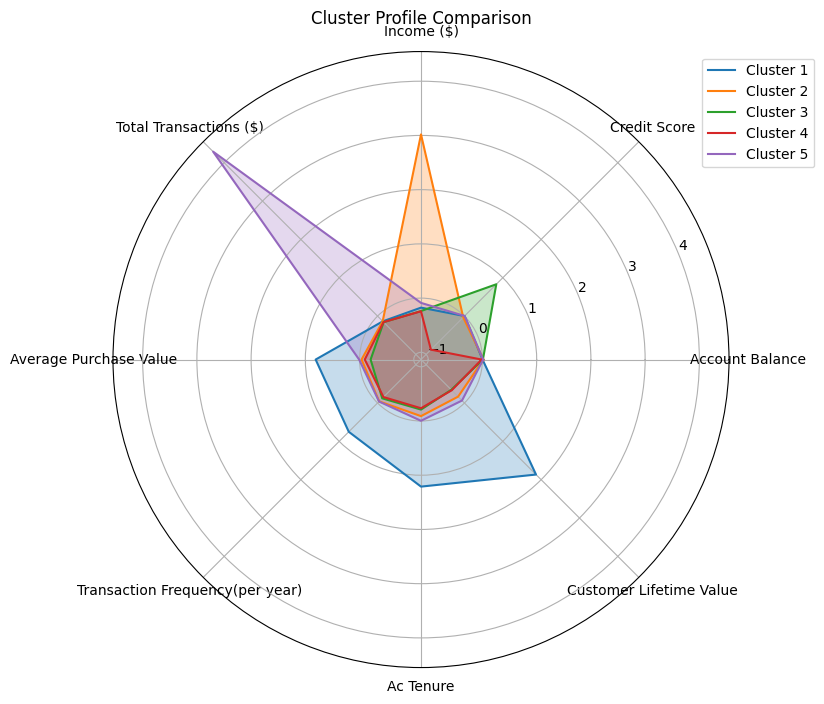

In [23]:
def create_radar_plot(centroids, features):
    """Generate radar plot for cluster centers"""
    num_features = len(features)
    angles = np.linspace(0, 2*np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'polar': True})

    for i, center in enumerate(centroids):
        values = np.append(center, center[0])
        ax.plot(angles, values, label=f'Cluster {i+1}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    plt.title('Cluster Profile Comparison', pad=20)
    plt.legend(bbox_to_anchor=(1.15, 1))
    plt.show()

# Generate plot
create_radar_plot(kmeans.cluster_centers_, numerical_cols)

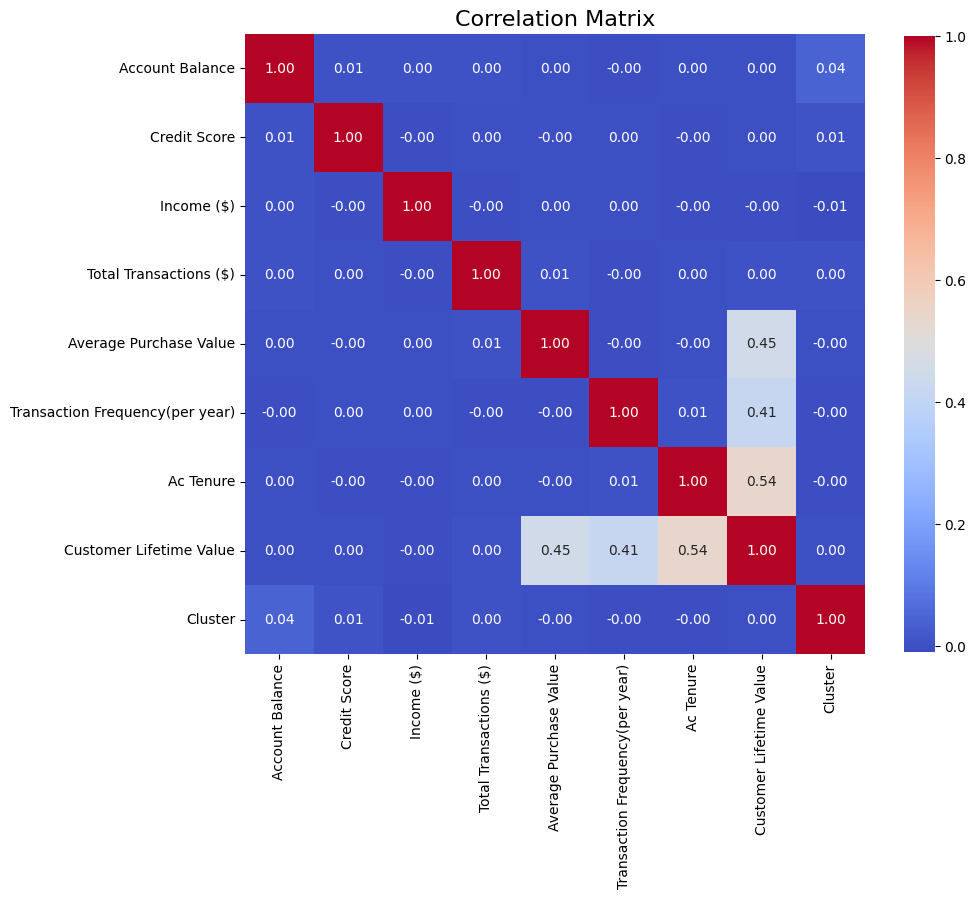

In [27]:
def main():
    # Select numerical columns
    numerical_cols_for_corr = df.select_dtypes(include=np.number).columns

    # Fill missing values with column mean
    df[numerical_cols_for_corr] = df[numerical_cols_for_corr].fillna(df[numerical_cols_for_corr].mean())

    # Convert to numeric to handle any non-numeric values
    for col in numerical_cols_for_corr:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Compute correlation matrix
    correlation_matrix = df[numerical_cols_for_corr].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

if __name__ == "__main__":
    main()